In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np


In [6]:
hdb_resale_data = pd.read_csv("data/processed/hdb_resale_data_final.csv", index_col=0)

In [7]:
hdb_resale_data.shape

(249857, 13)

In [8]:
hdb_resale_data.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,num_mrts_within_1km,min_dist_to_mrt_km
_id,,,,,,,,,,,,,
1,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0,1,0.352915
2,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0,0,0.816023
3,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,64,285000.0,1,0.229604
4,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,63,290000.0,1,0.664472
5,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,64,290000.0,0,0.923402


In [9]:
hdb_resale_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 249857 entries, 1 to 212704
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                249857 non-null  object 
 1   town                 249857 non-null  object 
 2   flat_type            249857 non-null  object 
 3   block                249857 non-null  object 
 4   street_name          249857 non-null  object 
 5   storey_range         249857 non-null  object 
 6   floor_area_sqm       249857 non-null  float64
 7   flat_model           249857 non-null  object 
 8   lease_commence_date  249857 non-null  int64  
 9   remaining_lease      249857 non-null  int64  
 10  resale_price         249857 non-null  float64
 11  num_mrts_within_1km  249857 non-null  int64  
 12  min_dist_to_mrt_km   249857 non-null  float64
dtypes: float64(3), int64(3), object(7)
memory usage: 26.7+ MB


In [10]:
numerical_features = hdb_resale_data.select_dtypes(include=['int64', 'float64']).reset_index(drop=True)

numerical_features.describe().T

,count,mean,std,min,25%,50%,75%,max
floor_area_sqm,249857.0,96.870696,24.057105,31.000000,80.000000,93.000000,112.000000,3.667000e+02
lease_commence_date,249857.0,1995.555342,13.937465,1966.000000,1985.000000,1996.000000,2006.000000,2.022000e+03
remaining_lease,249857.0,73.899823,13.734075,40.000000,63.000000,73.000000,86.000000,9.700000e+01
resale_price,249857.0,506457.831953,179415.160650,140000.000000,375000.000000,470000.000000,608000.000000,1.658888e+06
num_mrts_within_1km,249857.0,0.632566,0.714089,0.000000,0.000000,1.000000,1.000000,6.000000e+00
min_dist_to_mrt_km,249857.0,0.774630,0.437265,0.037148,0.457164,0.691146,0.991647,3.594500e+00


In [11]:
categorical_features = hdb_resale_data.select_dtypes(include=['object']).reset_index(drop=True)

categorical_features.describe().T

,count,unique,top,freq
month,249857,127,2024-07,3036
town,249857,26,SENGKANG,20086
flat_type,249857,7,4 ROOM,105192
block,249857,2745,2,801
street_name,249857,576,YISHUN RING RD,3665
storey_range,249857,17,04 TO 06,57777
flat_model,249857,21,Model A,86782


<h2>Checking for missing value

In [12]:
numerical_features.isnull().sum()

floor_area_sqm         0
lease_commence_date    0
remaining_lease        0
resale_price           0
num_mrts_within_1km    0
min_dist_to_mrt_km     0
dtype: int64

In [13]:
categorical_features.isnull().sum()

month           0
town            0
flat_type       0
block           0
street_name     0
storey_range    0
flat_model      0
dtype: int64

In [14]:
hdb_resale_data['resale_price']

_id
1          255000.0
2          275000.0
3          285000.0
4          290000.0
5          290000.0
            ...    
212700     975000.0
212701    1000000.0
212702     980000.0
212703     945000.0
212704    1095000.0
Name: resale_price, Length: 249857, dtype: float64

<h2> Checking for outliers

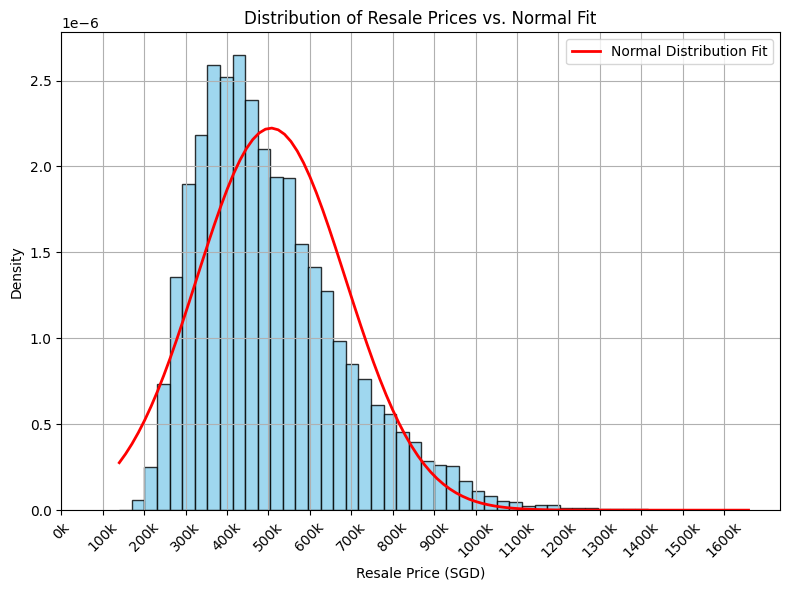

In [15]:
mu, sigma = stats.norm.fit(hdb_resale_data['resale_price'])

plt.figure(figsize=(8, 6))

# Histogram of resale prices
count, bins, ignored = plt.hist(hdb_resale_data['resale_price'], bins=50, density=True, color='skyblue', edgecolor='black', alpha=0.8)

# For normal distribution curve
x_norm = np.linspace(hdb_resale_data['resale_price'].min(), hdb_resale_data['resale_price'].max(), 100)
y_norm = stats.norm.pdf(x_norm, mu, sigma)
plt.plot(x_norm, y_norm, 'r-', linewidth=2, label='Normal Distribution Fit')

# Format x-axis in thousands, show fewer ticks
step = 100000  # tick interval (adjust if needed)
xticks = np.arange(0, hdb_resale_data['resale_price'].max(), step)
plt.xticks(xticks, [f'{int(x/1000)}k' for x in xticks], rotation=45)

# Labels and title
plt.title('Distribution of Resale Prices vs. Normal Fit')
plt.xlabel('Resale Price (SGD)')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

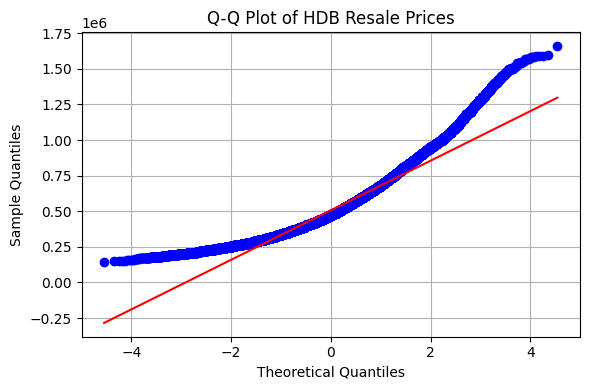

In [61]:
plt.figure(figsize=(6, 4))
stats.probplot(hdb_resale_data['resale_price'], dist="norm", plot=plt)

plt.title("Q-Q Plot of HDB Resale Prices")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.grid(True)
plt.tight_layout()
plt.show()


Although the resale price distribution shows moderate right skewness and some high-value outliers, these likely reflect real market conditions in central or MRT-accessible areas. As such, outliers were not removed but flagged for reference. Additionally, log transformation was considered to improve model performance on skewed targets

The price histogram is a bit skewed. Now we can:
- Include all data in your model and flagged the outliers
- Later analyze: "How does the model behave with vs without outliers?"
- Optionally build separate models for typical vs premium areas

In [17]:
Q1 = hdb_resale_data['resale_price'].quantile(0.25)
Q3 = hdb_resale_data['resale_price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

hdb_resale_data['is_outlier'] = (
    (hdb_resale_data['resale_price'] < lower_bound) | 
    (hdb_resale_data['resale_price'] > upper_bound)
)

In [18]:
hdb_resale_data.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,num_mrts_within_1km,min_dist_to_mrt_km,is_outlier
_id,,,,,,,,,,,,,,
1,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0,1,0.352915,False
2,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0,0,0.816023,False
3,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,64,285000.0,1,0.229604,False
4,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,63,290000.0,1,0.664472,False
5,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,64,290000.0,0,0.923402,False


<h2>Correlation matirx between numerical variables

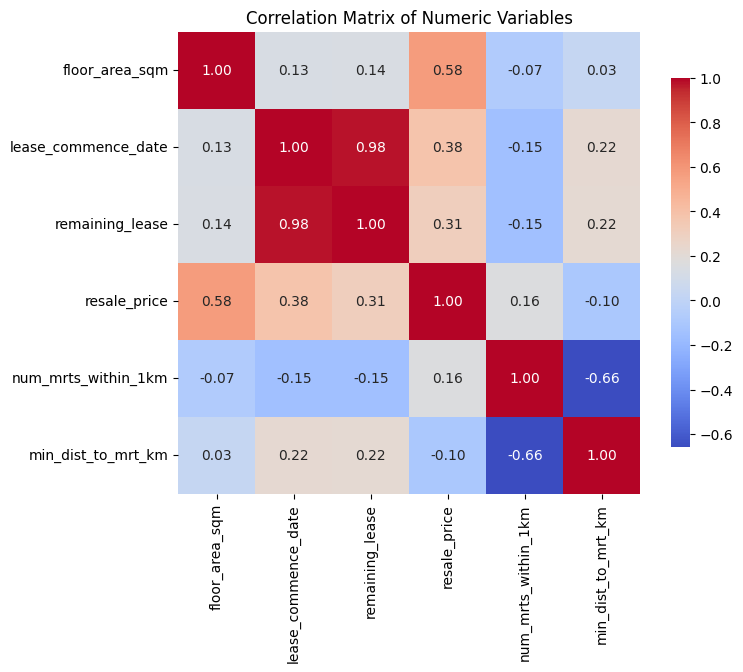

In [83]:
# Calculate correlation matrix
corr_matrix = hdb_resale_data[numerical_features.columns].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

plt.title("Correlation Matrix of Numeric Variables")
plt.show()


<h2> HDB resale prices differ significantly between towns.


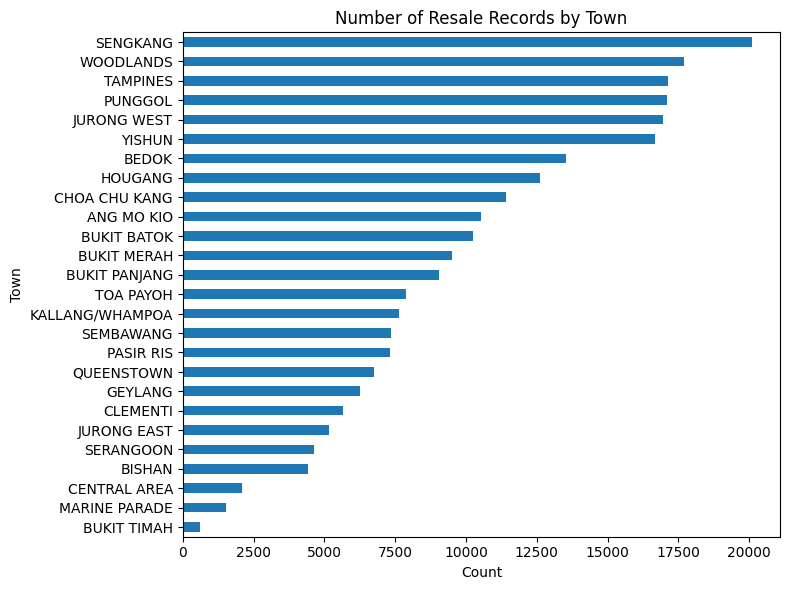

In [19]:
# Count and sort number of records per town
town_counts = hdb_resale_data['town'].value_counts(ascending=False)

plt.figure(figsize=(8, 6))
town_counts.plot(kind='barh')

plt.gca().invert_yaxis()  # Highest count at the top
plt.xlabel("Count")
plt.ylabel("Town")
plt.title("Number of Resale Records by Town")
plt.tight_layout()
plt.show()


Thesefore town is a good predictor of house price

<h2>Number of HDB Resale Records by Town and Region

In [21]:
# Define mapping
town_to_region = {
    'ANG MO KIO': 'Central',
    'BEDOK': 'East',
    'BISHAN': 'Central',
    'BUKIT BATOK': 'West',
    'BUKIT MERAH': 'Central',
    'BUKIT PANJANG': 'West',
    'BUKIT TIMAH': 'Central',
    'CENTRAL AREA': 'Central',
    'CHOA CHU KANG': 'West',
    'CLEMENTI': 'West',
    'GEYLANG': 'Central',
    'HOUGANG': 'Northeast',
    'JURONG EAST': 'West',
    'JURONG WEST': 'West',
    'KALLANG/WHAMPOA': 'Central',
    'MARINE PARADE': 'East',
    'PASIR RIS': 'East',
    'PUNGGOL': 'Northeast',
    'QUEENSTOWN': 'Central',
    'SEMBAWANG': 'North',
    'SENGKANG': 'Northeast',
    'SERANGOON': 'Northeast',
    'TAMPINES': 'East',
    'TOA PAYOH': 'Central',
    'WOODLANDS': 'North',
    'YISHUN': 'North'
}

# Apply mapping
hdb_resale_data['region'] = hdb_resale_data['town'].map(town_to_region)

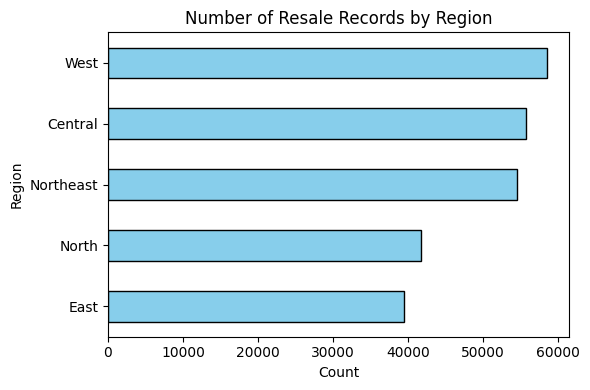

In [59]:
# Count and sort number of records per region
region_counts = hdb_resale_data['region'].value_counts(ascending=False)

plt.figure(figsize=(6, 4))
region_counts.plot(kind='barh', color='skyblue', edgecolor='black')

plt.gca().invert_yaxis()  # Show highest at the top
plt.xlabel("Count")
plt.ylabel("Region")
plt.title("Number of Resale Records by Region")
plt.tight_layout()
plt.show()


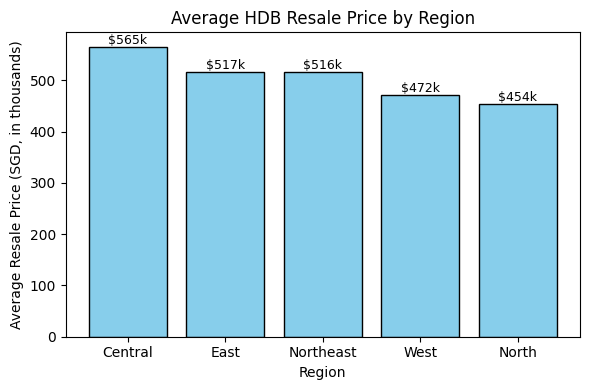

In [60]:
# Calculate average resale price by region (in thousands)
avg_price_by_region = hdb_resale_data.groupby('region')['resale_price'].mean().sort_values(ascending=False) / 1000

# Plot
plt.figure(figsize=(6, 4))
bars = plt.bar(avg_price_by_region.index, avg_price_by_region.values, color='skyblue', edgecolor='black')

# Add price labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2, height,
        f'${height:,.0f}k',
        ha='center', va='bottom', fontsize=9
    )

plt.ylabel("Average Resale Price (SGD, in thousands)")
plt.xlabel("Region")
plt.title("Average HDB Resale Price by Region")
plt.tight_layout()
plt.show()


This graph shows that the region has an effect on the resale price, especially in the Central region, where resale prices tend to be more expensive compared to other regions.

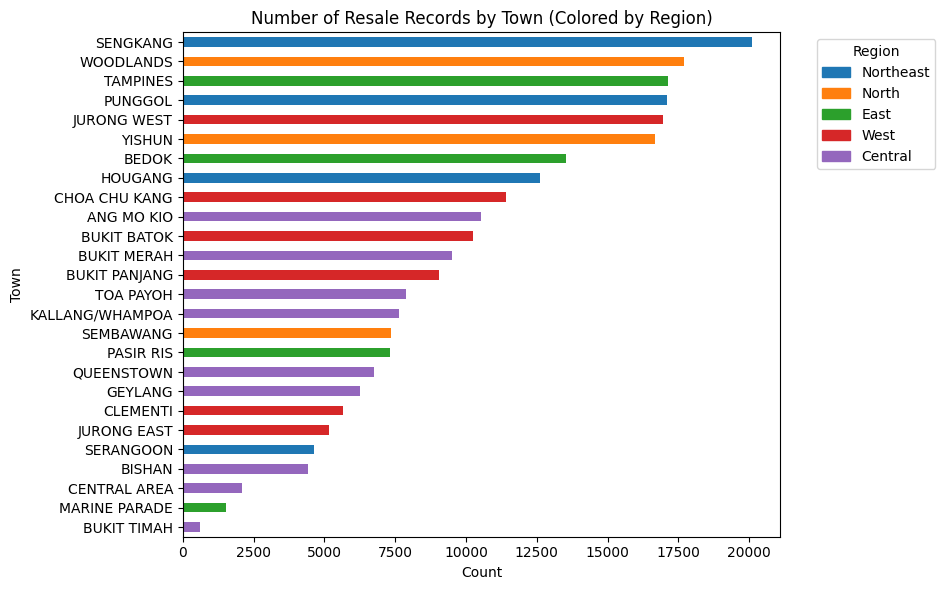

In [24]:
# Step 1: Count and sort number of records per town
town_counts = hdb_resale_data['town'].value_counts(ascending=False)

# Step 2: Create a town-to-region mapping
town_region_map = hdb_resale_data.drop_duplicates('town').set_index('town')['region']

# Step 3: Map each town to its region
town_regions = town_counts.index.map(town_region_map)

# Step 4: Assign a unique color per region
region_colors = {
    region: color for region, color in zip(town_regions.unique(), plt.cm.tab10.colors)
}
bar_colors = [region_colors[region] for region in town_regions]

# Step 5: Plot horizontal bar chart
plt.figure(figsize=(8, 6))
town_counts.plot(kind='barh', color=bar_colors)

plt.gca().invert_yaxis()  # Highest count at the top
plt.xlabel("Count")
plt.ylabel("Town")
plt.title("Number of Resale Records by Town (Colored by Region)")
plt.tight_layout()

# Step 6: Add legend
from matplotlib.patches import Patch
legend_handles = [Patch(color=color, label=region) for region, color in region_colors.items()]
plt.legend(handles=legend_handles, title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


<h2>Distribution of HDB Resale Transactions by Flat Model

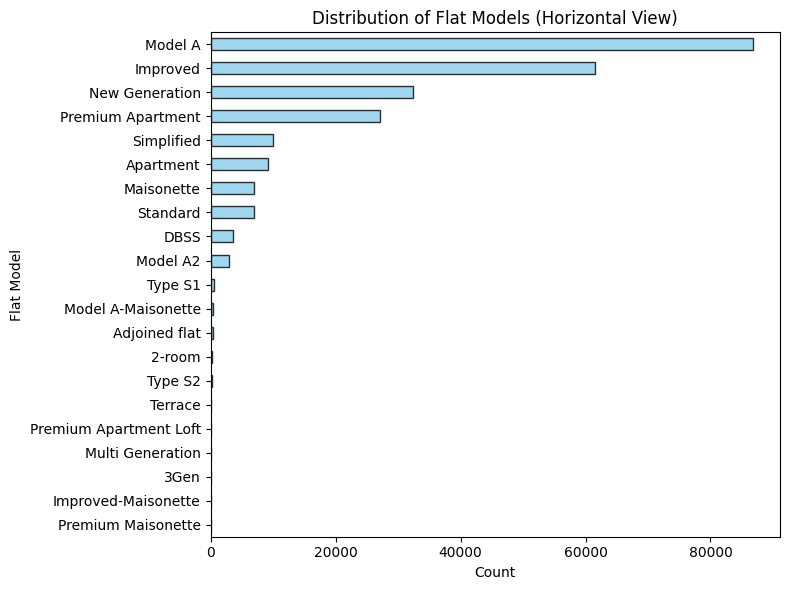

In [91]:
# Count number of records per flat model
flat_model_counts = hdb_resale_data['flat_model'].value_counts().sort_values(ascending=True)

# Plot horizontal bar chart
plt.figure(figsize=(8, 6))
flat_model_counts.plot(kind='barh', color='skyblue', edgecolor='black', alpha=0.8)

plt.xlabel("Count")
plt.ylabel("Flat Model")
plt.title("Distribution of Flat Models (Horizontal View)")
plt.tight_layout()
plt.show()


C:\Users\faldh\AppData\Local\Temp\ipykernel_7972\4091048070.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=hdb_resale_data, x='flat_model', y='resale_price', palette='Set2')


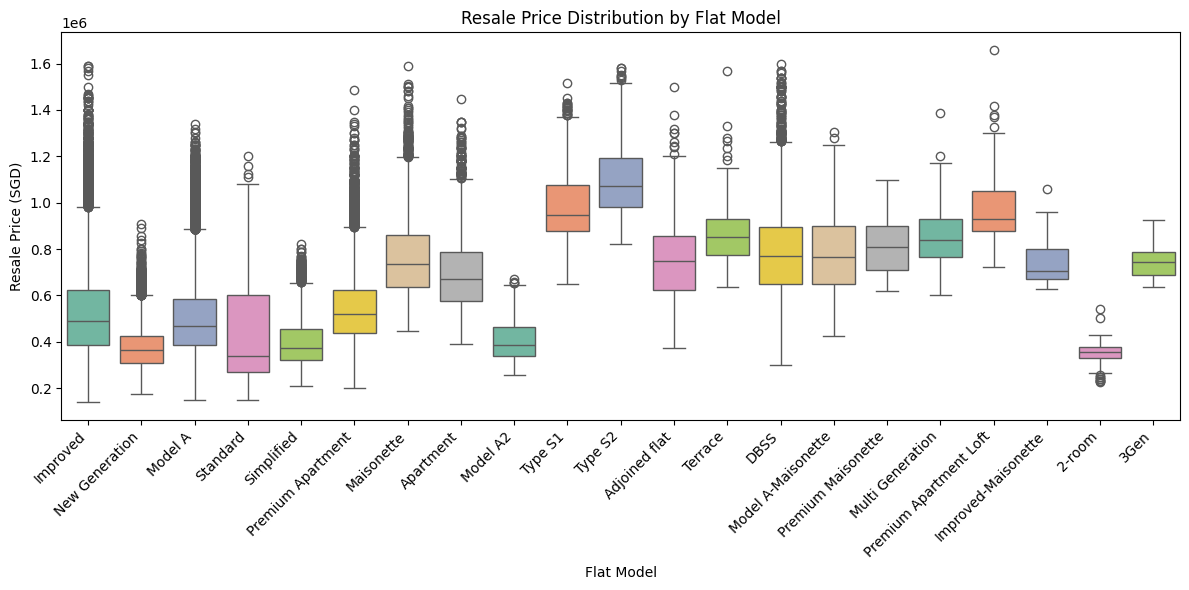

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(data=hdb_resale_data, x='flat_model', y='resale_price', palette='Set2')

plt.xticks(rotation=45, ha='right')
plt.title("Resale Price Distribution by Flat Model")
plt.xlabel("Flat Model")
plt.ylabel("Resale Price (SGD)")
plt.tight_layout()
plt.show()

The boxplot shows clear differences in resale price distributions among flat models, with median prices varying substantially across types. This visual evidence supports that flat model type has a significant effect on resale price

In [70]:
# Prepare groups for each flat model
groups = [group['resale_price'].values for _, group in hdb_resale_data.groupby('flat_model')]

# Perform Kruskal-Wallis H-test
h_stat, p_val = kruskal(*groups)

print(f"Kruskal-Wallis H-statistic: {h_stat:.2f}, p-value: {p_val:.4f}")


Kruskal-Wallis H-statistic: 64008.44, p-value: 0.0000


Since the p-value is far below the typical significance threshold of 0.05, this means there is strong statistical evidence that resale prices differ significantly between different flat models.

The chart displays resale transaction counts for each flat model, sorted from lowest to highest. Flat models like ‘Type S1’ and ‘Premium Maisonette’ have noticeably fewer transactions compared to more common models.  

We should test Group Rare Flat Models together or removing ..

<h2>Distribution of HDB Resale Transactions by Flat Type

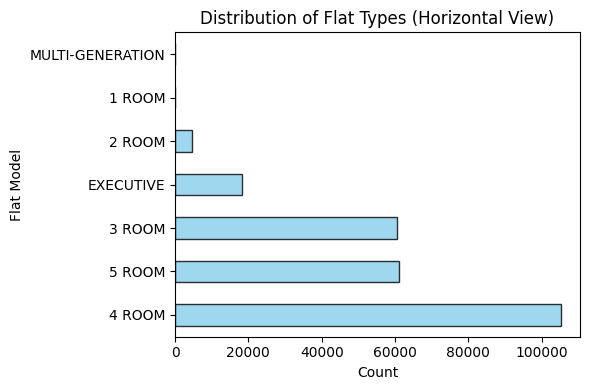

In [73]:
# Count number of records per flat model
flat_model_counts = hdb_resale_data['flat_type'].value_counts()

# Plot horizontal bar chart
plt.figure(figsize=(6, 4))
flat_model_counts.plot(kind='barh', color='skyblue', edgecolor='black', alpha=0.8)

plt.xlabel("Count")
plt.ylabel("Flat Model")
plt.title("Distribution of Flat Types (Horizontal View)")
plt.tight_layout()
plt.show()



C:\Users\faldh\AppData\Local\Temp\ipykernel_7972\1420359650.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=hdb_resale_data, x='flat_type', y='resale_price', palette='Set2')


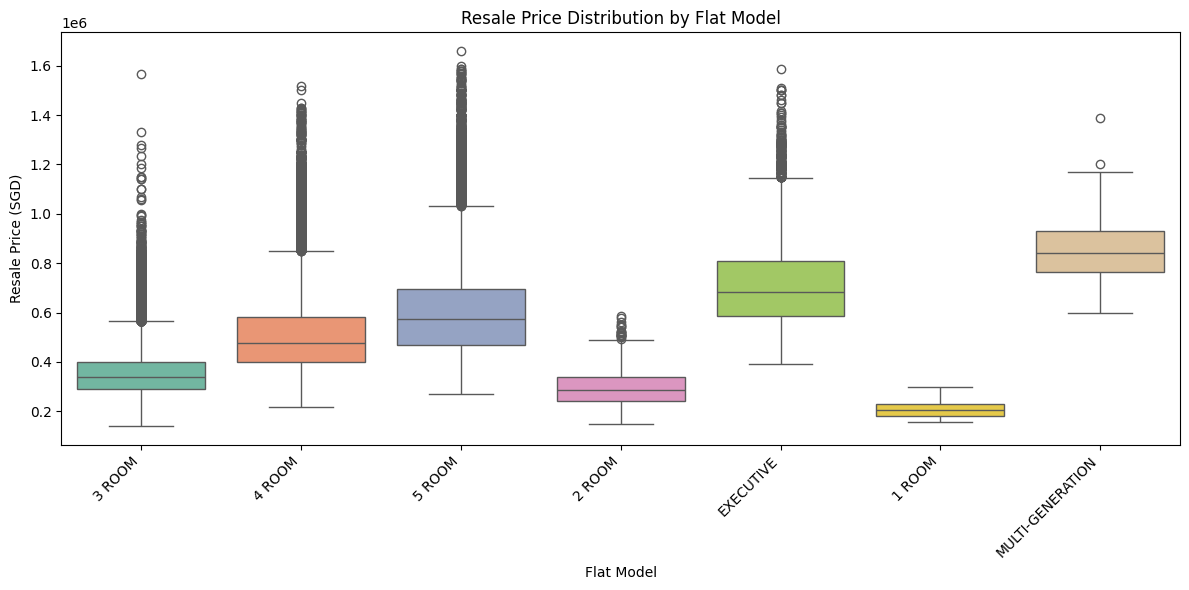

In [93]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=hdb_resale_data, x='flat_type', y='resale_price', palette='Set2')

plt.xticks(rotation=45, ha='right')
plt.title("Resale Price Distribution by Flat Model")
plt.xlabel("Flat Model")
plt.ylabel("Resale Price (SGD)")
plt.tight_layout()
plt.show()

The boxplot shows clear differences in resale price distributions among flat type, with median prices varying substantially across types. This visual evidence supports that flat model type has a significant effect on resale price

In [84]:
hdb_resale_data

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,num_mrts_within_1km,min_dist_to_mrt_km,is_outlier,region,year
_id,,,,,,,,,,,,,,,,
1,2015-01-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0,1,0.352915,False,Central,2015
2,2015-01-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0,0,0.816023,False,Central,2015
3,2015-01-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,64,285000.0,1,0.229604,False,Central,2015
4,2015-01-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,63,290000.0,1,0.664472,False,Central,2015
5,2015-01-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,64,290000.0,0,0.923402,False,Central,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212700,2025-04-01,YISHUN,EXECUTIVE,828,YISHUN ST 81,04 TO 06,146.0,Maisonette,1988,61,975000.0,1,0.246096,True,North,2025
212701,2025-05-01,YISHUN,EXECUTIVE,828,YISHUN ST 81,04 TO 06,142.0,Apartment,1988,61,1000000.0,1,0.246096,True,North,2025
212702,2025-07-01,YISHUN,EXECUTIVE,824,YISHUN ST 81,04 TO 06,146.0,Maisonette,1987,61,980000.0,1,0.408843,True,North,2025


<h2>Are resale prices higher for flats closer to MRT stations?

In [124]:
print('correlation between distance to MRT and resale price is ' + str(round(hdb_resale_data['resale_price'].corr(hdb_resale_data['min_dist_to_mrt_km']),4)))

correlation between distance to MRT and resale price is -0.1019


In [113]:
from scipy.stats import kruskal

grouped_prices = [
    group['resale_price'].values
    for _, group in hdb_resale_data.groupby('min_dist_to_mrt_km')
]

stat, p = kruskal(*grouped_prices)
print(f"Kruskal-Wallis H-statistic: {stat:.2f}, p-value: {p:.4f}")


Kruskal-Wallis H-statistic: 178527.09, p-value: 0.0000


There is not enough evidance to say that MRT distance to HDB could affect the resale price of an HDB

<h2>Is number of MRT nearby affect the price of an HDB?

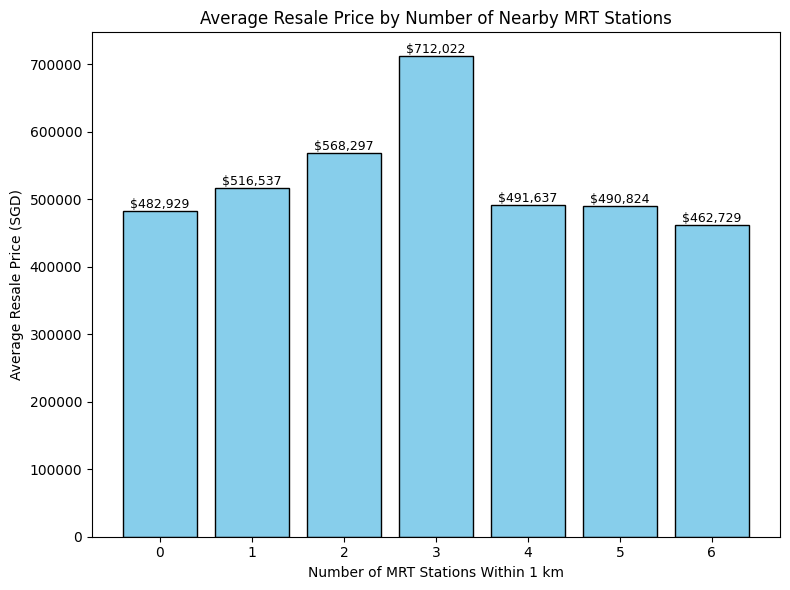

In [132]:
import matplotlib.pyplot as plt

# Calculate average resale price grouped by number of MRTs nearby
avg_price_by_mrt = hdb_resale_data.groupby('num_mrts_within_1km')['resale_price'].mean()

# Plot bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(avg_price_by_mrt.index.astype(str), avg_price_by_mrt.values, color='skyblue', edgecolor='black')

# Add price labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'${height:,.0f}', 
             ha='center', va='bottom', fontsize=9)

plt.xlabel("Number of MRT Stations Within 1 km")
plt.ylabel("Average Resale Price (SGD)")
plt.title("Average Resale Price by Number of Nearby MRT Stations")
plt.tight_layout()
plt.show()


In [133]:
corr = hdb_resale_data['num_mrts_within_1km'].corr(hdb_resale_data['resale_price'])
print(f"Correlation between number of MRTs nearby and resale price: {corr:.3f}")


Correlation between number of MRTs nearby and resale price: 0.159


There is no strong correlation overall, but flats with 3 MRT stations nearby tend to have somewhat higher resale prices.

<h2>Is there a correlation between floor area and resale price?

In [122]:
print('correlation between floor area in sqm and resale price is ' + str(round(hdb_resale_data['resale_price'].corr(hdb_resale_data['floor_area_sqm']),4)))

correlation between floor area in sqm and resale price is 0.5763


This indicates a moderate positive relationship between HDB size and resale price. While floor size is an important factor, it is not the only predictor of resale price.

<h2>Are there seasonal or yearly trends in resale prices over time?

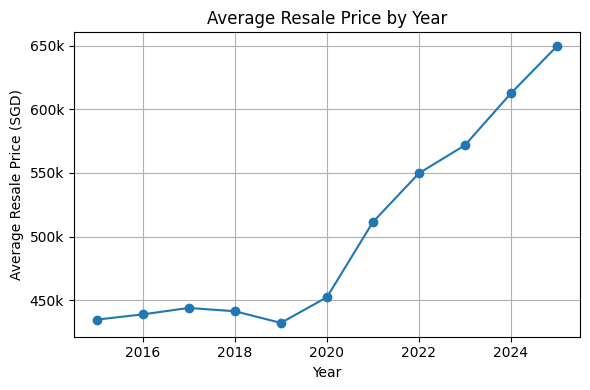

In [121]:
avg_price_by_year = hdb_resale_data.groupby('year')['resale_price'].mean()

plt.figure(figsize=(6, 4))
avg_price_by_year.plot(kind='line', marker='o')


plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x/1000:.0f}k'))
plt.title("Average Resale Price by Year")
plt.xlabel("Year")
plt.ylabel("Average Resale Price (SGD)")
plt.grid(True)
plt.tight_layout()
plt.show()


<Figure size 800x600 with 0 Axes>

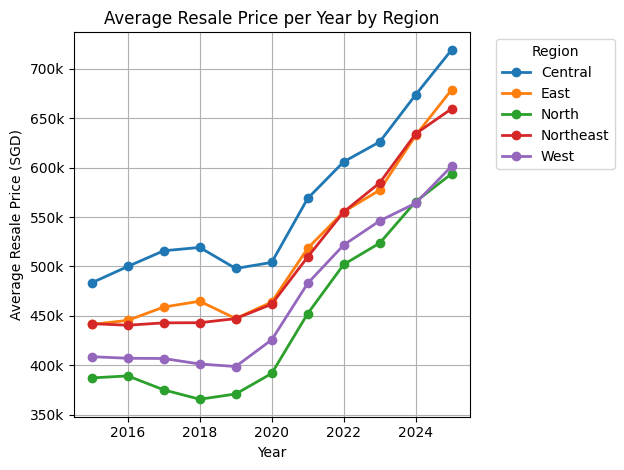

In [120]:
from matplotlib.ticker import FuncFormatter

# Ensure 'month' column is datetime
hdb_resale_data['month'] = pd.to_datetime(hdb_resale_data['month'])

# Group by year and region, then calculate average resale price
avg_price_by_region = (
    hdb_resale_data
    .groupby([hdb_resale_data['month'].dt.year, hdb_resale_data['region']])['resale_price']
    .mean()
    .unstack()  # Regions become separate lines
)

# Plotting
plt.figure(figsize=(8, 6))
avg_price_by_region.plot(marker='o', linewidth=2)

plt.title("Average Resale Price per Year by Region")
plt.xlabel("Year")
plt.ylabel("Average Resale Price (SGD)")
plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

# Format y-axis labels in thousands
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x/1000:.0f}k'))

plt.tight_layout()
plt.show()

The Hbd prices between 2015 to 2020 were relatively stable, however after 2020 the prices started to rise drastically, probably due to post covid inflation. This is a strong evidence that seasonality exist in the dataset. Based on this finding, when training a model, it is might be necessary to evaluate performance uinsg both post covid data and the full dataset. Also, models that incorporate time features, such as tree-based models (XGBoost, LightGBM) and ARIMA, may perform better for this type of dataset.

<h2>Does the floor level influence the price?

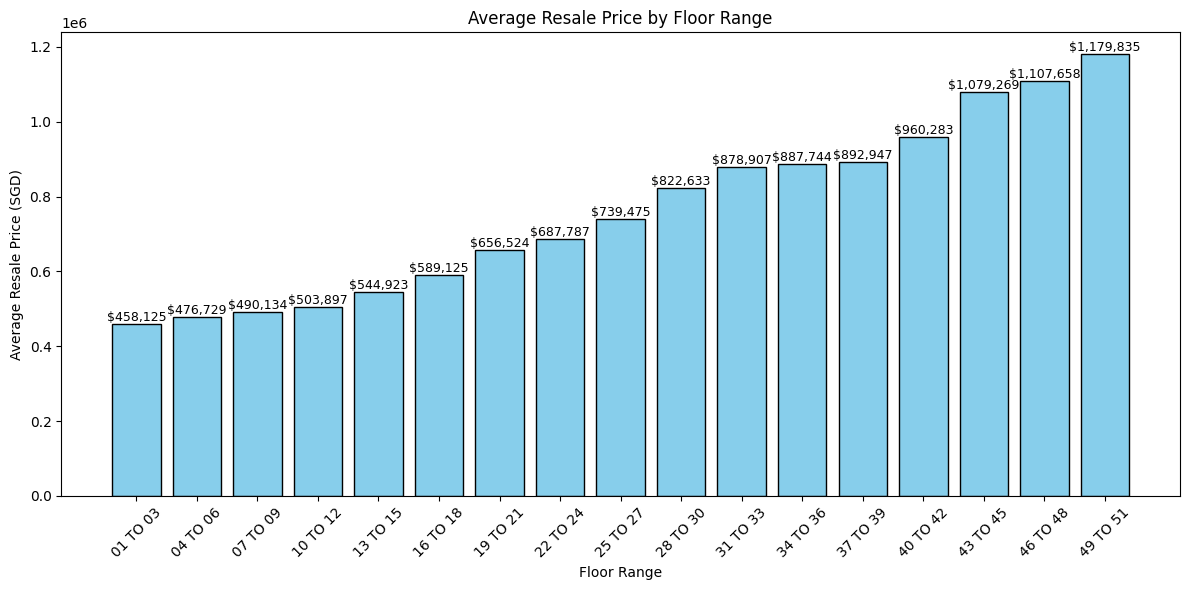

In [ ]:
# Calculate average resale price by storey_range
avg_price_by_floor = hdb_resale_data.groupby('storey_range')['resale_price'].mean()

# Sort floor ranges by their numeric lower bound for proper order
def floor_sort_key(floor_range):
    return int(floor_range.split(' TO ')[0])

avg_price_by_floor = avg_price_by_floor.sort_index(key=lambda x: x.map(floor_sort_key))

# Plot
plt.figure(figsize=(12, 6))
bars = plt.bar(avg_price_by_floor.index, avg_price_by_floor.values, color='skyblue', edgecolor='black')

# Add average price values on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'${height:,.0f}', 
             ha='center', va='bottom', fontsize=9)

plt.xticks(rotation=45)
plt.xlabel("Floor Range")
plt.ylabel("Average Resale Price (SGD)")
plt.title("Average Resale Price by Floor Range")
plt.tight_layout()
plt.show()
